In [ ]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 74.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 33.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [ ]:
import tensorflow as tf

# Check if the keras module is imported correctly
if not hasattr(tf, 'keras'):
    raise ImportError("Keras module not found. Please install TensorFlow with Keras support.")

print(f"Tensorflow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")

Tensorflow Version: 2.16.1
Keras Version: 3.3.3


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [ ]:
## checking version of tensorflow ans keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.16.1
Keras Version 3.3.3


In [ ]:
os.getcwd()

'/content'

In [ ]:
## gpu/cpu check
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
check_list=["GPU","CPU"]
for device in check_list:
    out = tf.config.list_physical_devices(device)
    if len(out) > 0:
        print(f"{device} is available!")
        print(f"Details>>{out}")
    else:
        print(f"{device} isn't available ")

GPU is available!
Details>>[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available!
Details>>[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [ ]:
## creating a simple classifier using keras on mnist data
mnist=tf.keras.datasets.mnist

In [ ]:
mnist

<module 'keras.api.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/datasets/mnist/__init__.py'>

In [ ]:
(x_train_full,y_train_full),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train_full.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
print(f"data type of x_train_full:{x_train_full.dtype},\n shape of x_train_full: {x_train_full.shape}")

data type of x_train_full:uint8,
 shape of x_train_full: (60000, 28, 28)


In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
## create a validation data set from the full training data
## scale the data between 0 to 1 by dividing it by 255 as its unsigned data between 0-255 range
x_valid,x_train=x_train_full[:5000] / 255., x_train_full[5000:] / 255.
y_valid,y_train = y_train_full[:5000] , y_train_full[5000:]

## scale the test set as well
x_test = x_test /255.

In [ ]:
len(x_test[1][0])

28

In [ ]:
## train-55000
## test -10000
## val- 5000
len(x_train_full[5000:])

55000

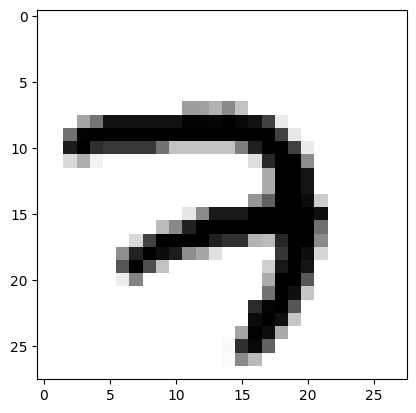

In [ ]:
plt.imshow(x_train[0],cmap="binary")
plt.show()

<Axes: >

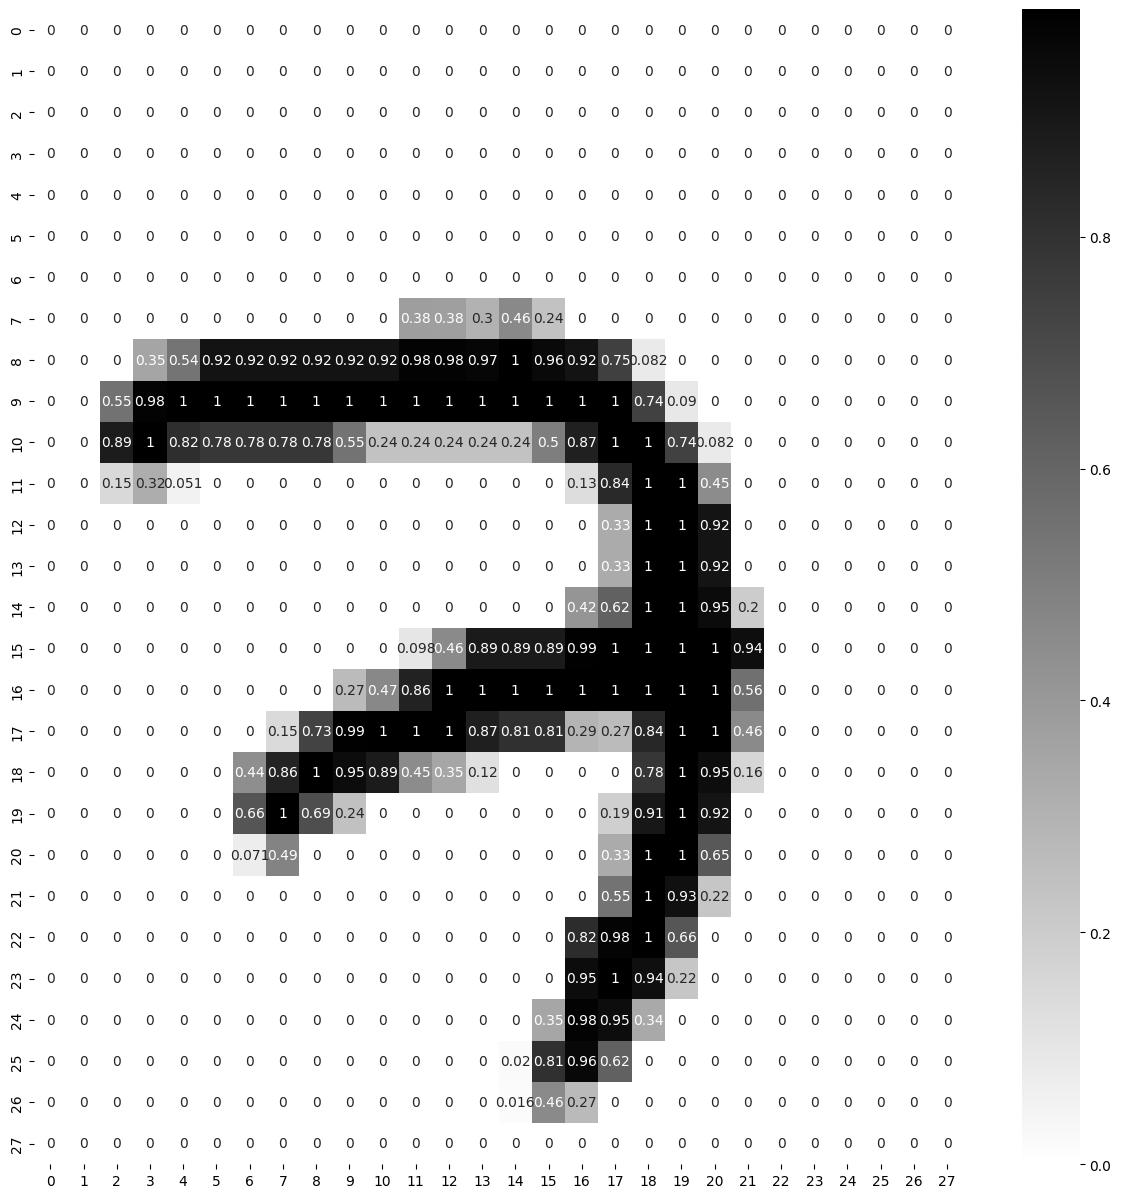

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train[0],annot=True,cmap="binary")

In [ ]:
28*28

784

In [ ]:
0,1,2,3,4,5,6,7,8,9

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

In [ ]:
## creating layers of ann
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name="inputLayer"),
        tf.keras.layers.Dense(300,activation="relu",name="hiddenLayer1"),
        tf.keras.layers.Dense(100,activation="relu",name="hiddenLayer2"),
        tf.keras.layers.Dense(10,activation="softmax",name="outputLayer")]
model_clf=tf.keras.models.Sequential(LAYERS)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# method-2
#from keras.models import Sequential
#from keras.layers import Dense
## define the model
#model= Sequential()
#model.add(Dense(units=64,acivation="relu",input_dim=100))
#model.add(Dense(units=10,activation="softmax"))
## compile the model
## model.compile(loss="categorical_crossentropy",optimiser="sgd",metrics=["accuracy"])
## train the model
# model.fit(x_train,y_train,epocha=5,batch_size=32)

In [ ]:
model_clf.layers

[<Flatten name=inputLayer, built=True>,
 <Dense name=hiddenLayer1, built=True>,
 <Dense name=hiddenLayer2, built=True>,
 <Dense name=outputLayer, built=True>]

In [ ]:
model_clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenLayer1 (Dense)                 │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenLayer2 (Dense)                 │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputLayer (Dense)                  │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
## firstLayer + secondLayer + bias
784*300 + 300, 300*100+100 , 100*10+10

(235500, 30100, 1010)

In [ ]:
## total parameters to be trained
sum((235500,30100,1010))

266610

In [ ]:
hidden1=model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [ ]:
hidden1.get_weights()[0].shape

(784, 300)

In [ ]:
hidden1.get_weights()[1].shape

(300,)

In [ ]:
weights , biases = hidden1.get_weights()

In [ ]:
weights.shape

(784, 300)

In [ ]:
print("shape\n",weights.shape,"\n")
weights

shape
 (784, 300) 



array([[-0.01969957, -0.02925293, -0.07069319, ..., -0.06249018,
        -0.01623471,  0.00344512],
       [ 0.01799147,  0.06189223,  0.06484513, ...,  0.05762662,
        -0.06436954, -0.06047516],
       [ 0.02015054,  0.06043257,  0.03418629, ..., -0.06081798,
         0.00502338,  0.03064395],
       ...,
       [-0.06803372, -0.05096628,  0.02663507, ..., -0.05490174,
         0.03013473,  0.06005441],
       [ 0.02165724,  0.06800863, -0.05861268, ..., -0.02251093,
        -0.03734427,  0.01182394],
       [ 0.05944708, -0.00681885,  0.00357643, ..., -0.04634999,
        -0.00887572, -0.02680662]], dtype=float32)

In [ ]:
print("shape\n",biases.shape)

shape
 (300,)


In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use tf.losses.sparse_categorical_crossentrophy
OPTIMIZER="SGD" ## or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS=["accuracy"]
model_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [ ]:
## training
EPOCHS=30
VALIDATION_SET=(x_valid,y_valid)
history =  model_clf.fit(x_train,y_train,epochs=EPOCHS,
                         validation_data=VALIDATION_SET,batch_size=32)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7291 - loss: 1.0397 - val_accuracy: 0.9146 - val_loss: 0.3121
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9127 - loss: 0.3035 - val_accuracy: 0.9326 - val_loss: 0.2511
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9294 - loss: 0.2500 - val_accuracy: 0.9432 - val_loss: 0.2095
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9400 - loss: 0.2119 - val_accuracy: 0.9490 - val_loss: 0.1874
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9486 - loss: 0.1809 - val_accuracy: 0.9548 - val_loss: 0.1649
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9514 - loss: 0.1651 - val_accuracy: 0.9572 - val_loss: 0.1546
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9597 - loss: 0.1451 - val_accuracy: 0.9628 - val_loss: 0.1366
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9630 - loss: 0.1318 - 

In [ ]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [ ]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.839109,0.623321,0.9146,0.312129
1,0.915745,0.292073,0.9326,0.251054
2,0.931727,0.240338,0.9432,0.209482
3,0.941636,0.205832,0.9490,0.187418
4,0.949091,0.179485,0.9548,0.164919
5,0.954818,0.158884,0.9572,0.154558
6,0.959655,0.141700,0.9628,0.136598
7,0.963309,0.127893,0.9646,0.128691
8,0.967436,0.116149,0.9672,0.118899
9,0.970455,0.105892,0.9686,0.112995


<Axes: >

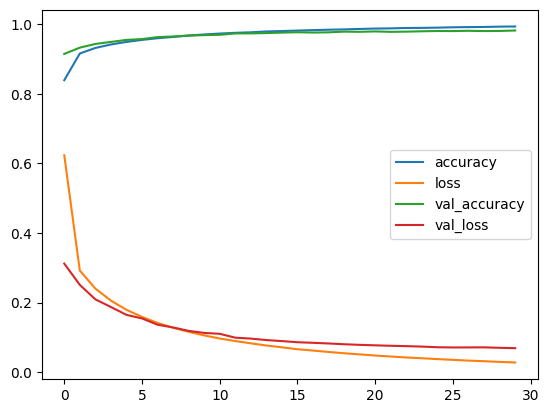

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model_clf.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9739 - loss: 0.0834


[0.0699448212981224, 0.9785000085830688]

In [ ]:
x_new=x_test[:3]
## x new

In [ ]:
## sample check test data
actual =y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<Axes: >

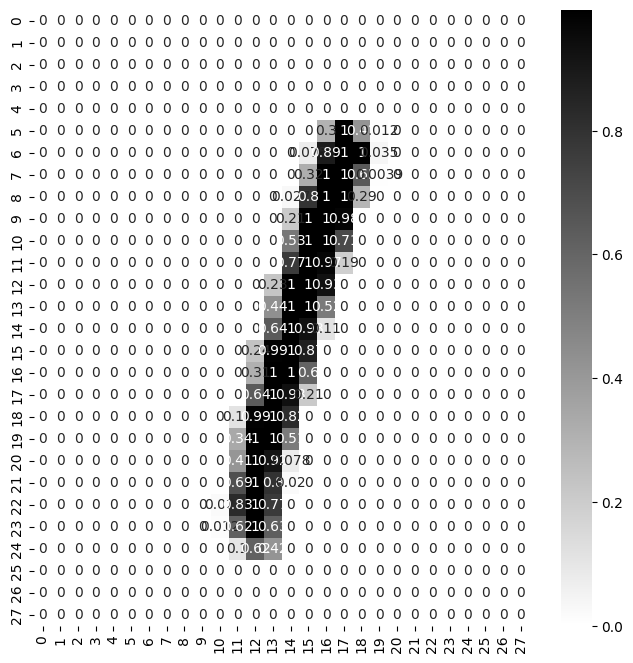

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(x_test[5],annot=True,cmap="binary")

In [ ]:
y_prob=model_clf.predict(x_new)
y_prob.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_prob

array([[6.7052844e-07, 1.0383975e-07, 1.7391445e-05, 7.6480454e-04,
        3.2371169e-08, 2.3519856e-07, 5.2019989e-11, 9.9920940e-01,
        7.1833949e-07, 6.6906341e-06],
       [2.6343146e-06, 2.6554762e-05, 9.9984467e-01, 1.0327544e-04,
        1.2424231e-10, 2.9053087e-06, 1.5796342e-06, 3.3730577e-11,
        1.8442319e-05, 9.3332390e-12],
       [2.3342884e-05, 9.9814296e-01, 1.4801860e-04, 2.7917771e-05,
        6.1664364e-04, 6.5629705e-05, 8.6660468e-05, 4.4054538e-04,
        4.2602987e-04, 2.2412802e-05]], dtype=float32)

In [ ]:
y_pred=np.argmax(y_prob,axis=-1)

In [ ]:
y_pred

array([7, 2, 1])

In [ ]:
actual

array([7, 2, 1], dtype=uint8)

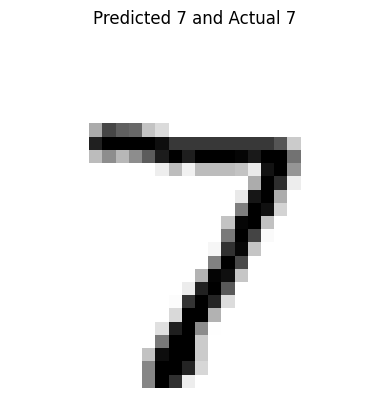

#####################


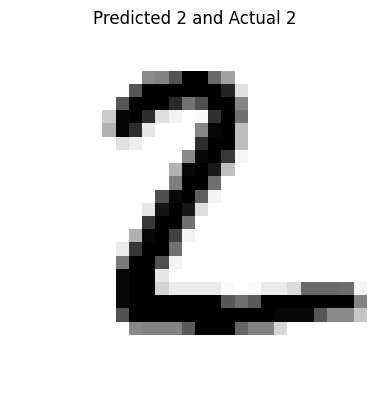

#####################


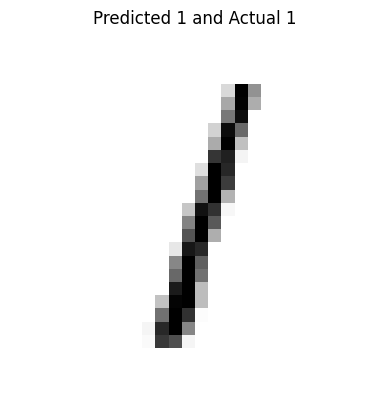

#####################


In [ ]:
## plot
for data, pred,actual_data in zip(x_new,y_pred,actual):
  plt.imshow(data,cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("#####################")